In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# load dataset
data = pd.read_csv("database/IEEE/top_1000_pe_imports.csv")

In [3]:
# rename column name
data = data.rename(columns={"malware":"label"})

# show data
data

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,label
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47575,9b917bab7f32188ae40c744f2be9aaf8,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
47576,35a18ee05f75f04912018d9f462cb990,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
47577,654139d715abcf7ecdddbef5a84f224b,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
47578,078c9d4e7be4819a06974c6f292a4857,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


<br><br>

Make train and test dataset.

In [4]:
# make train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.3, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/ieee_train_70.csv", index=False)
X_test.to_csv("database/ieee_test_30.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33306 entries, 24206 to 15795
Columns: 1002 entries, hash to label
dtypes: int64(1001), object(1)
memory usage: 254.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14274 entries, 15521 to 23263
Columns: 1002 entries, hash to label
dtypes: int64(1001), object(1)
memory usage: 109.2+ MB
None


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.2, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/ieee_train_80.csv", index=False)
X_test.to_csv("database/ieee_test_20.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38064 entries, 16599 to 15795
Columns: 1002 entries, hash to label
dtypes: int64(1001), object(1)
memory usage: 291.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 15521 to 24024
Columns: 1002 entries, hash to label
dtypes: int64(1001), object(1)
memory usage: 72.8+ MB
None


<br><br>

Make folds.

In [4]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(data)
print(kf)

KFold(n_splits=3, random_state=42, shuffle=True)


In [5]:
train_folds = []
test_folds = []

for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index))
    train_folds.append(data.iloc[train_index])
    test_folds.append(data.iloc[test_index])

TRAIN: [    2     3     5 ... 47577 47578 47579] TEST: [    0     1     4 ... 47567 47568 47571]
31720
TRAIN: [    0     1     2 ... 47575 47576 47577] TEST: [    3     8    14 ... 47573 47578 47579]
31720
TRAIN: [    0     1     3 ... 47573 47578 47579] TEST: [    2     5     9 ... 47575 47576 47577]
31720


In [6]:
train_folds[0].to_csv('database/ieee_train_fold1.csv', index=False)
train_folds[1].to_csv('database/ieee_train_fold2.csv', index=False)
train_folds[2].to_csv('database/ieee_train_fold3.csv', index=False)

test_folds[0].to_csv('database/ieee_test_fold1.csv', index=False)
test_folds[1].to_csv('database/ieee_test_fold2.csv', index=False)
test_folds[2].to_csv('database/ieee_test_fold3.csv', index=False)

<br><br>

## data analysis

In [4]:
data.describe()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,label
count,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,...,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000
mean,0.872236,0.847079,0.760004,0.783459,0.770618,0.683501,0.665826,0.669966,0.756578,0.674107,...,0.024800,0.024590,0.024401,0.024359,0.024275,0.024191,0.024149,0.023939,0.023686,0.959458
std,0.333830,0.359915,0.427085,0.411891,0.420440,0.465115,0.471706,0.470230,0.429152,0.468713,...,0.155518,0.154874,0.154292,0.154163,0.153903,0.153643,0.153513,0.152860,0.152072,0.197229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


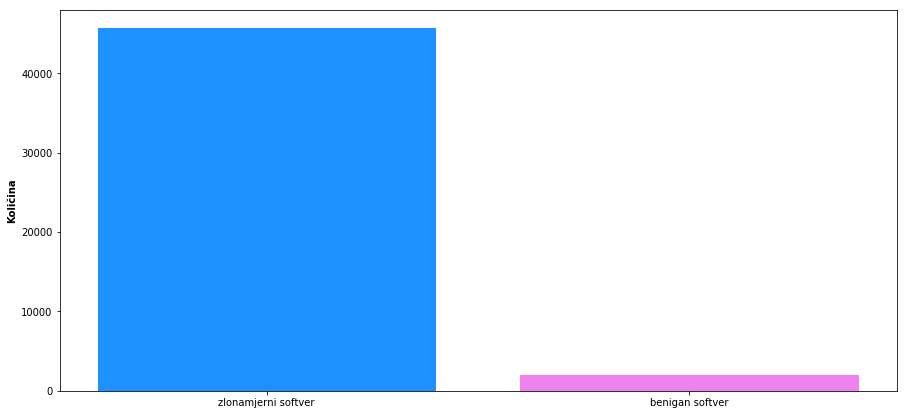

In [5]:
number_of_malicious = sum(data["label"])
number_of_benign = data.shape[0] - number_of_malicious

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(["zlonamjerni softver", "benigan softver"], [number_of_malicious, number_of_benign], color = ['dodgerblue', 'violet'])
plt.xticks(rotation='horizontal')
plt.ylabel('Količina', fontweight='bold')

plt.show()

In [6]:
print(abs(data.corrwith(data['label']).dropna()).sort_values()) 

ExtTextOutW              0.000361
SetBkColor               0.000381
SysAllocStringByteLen    0.000744
DeregisterEventSource    0.000797
LoadIconW                0.001162
                           ...   
__setusermatherr         0.422460
__set_app_type           0.438921
exit                     0.458680
_cexit                   0.541799
label                    1.000000
Length: 1001, dtype: float64


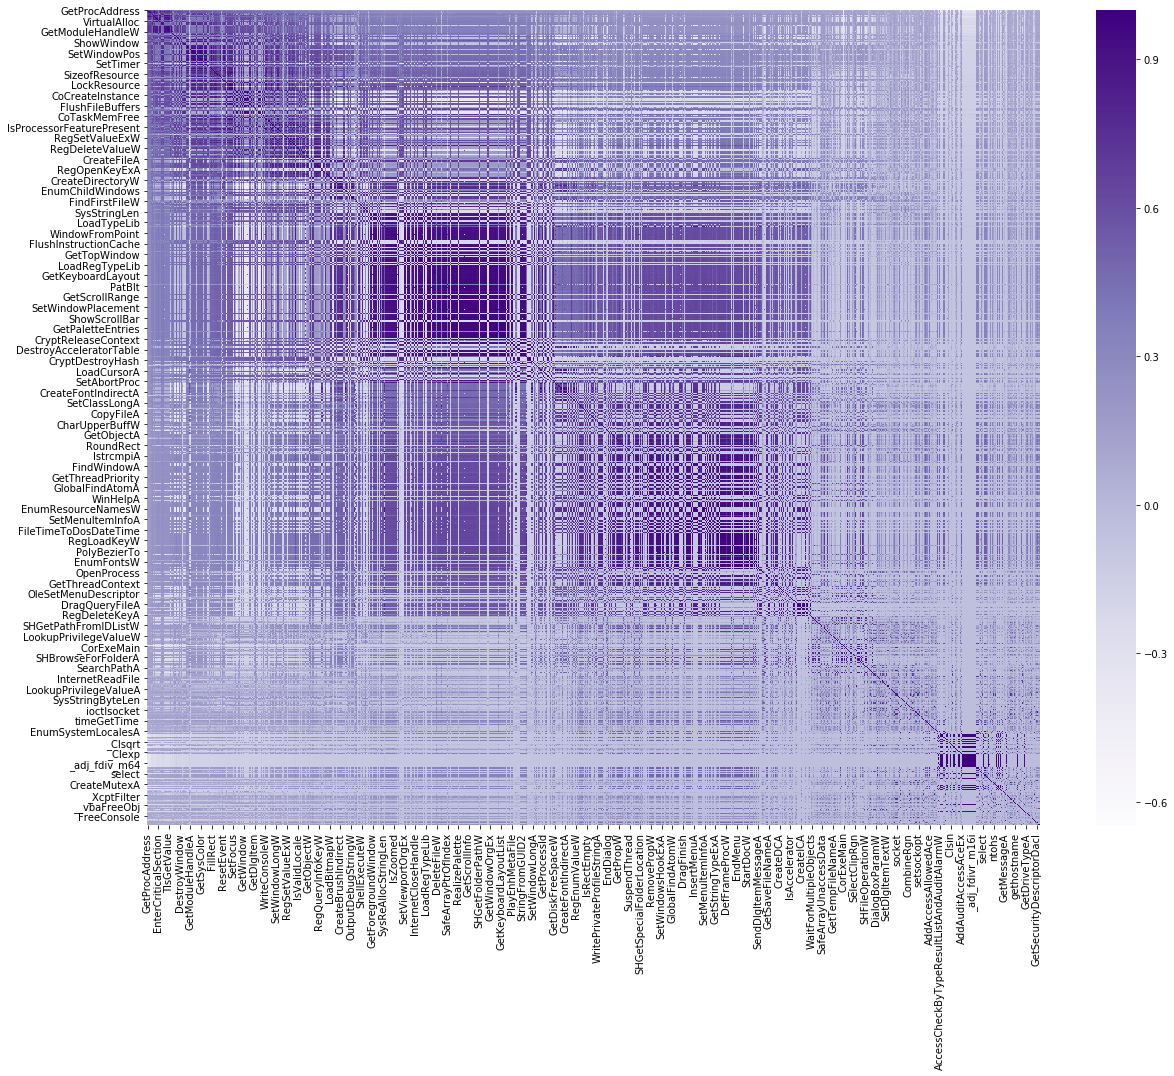

In [7]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in data.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, data[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

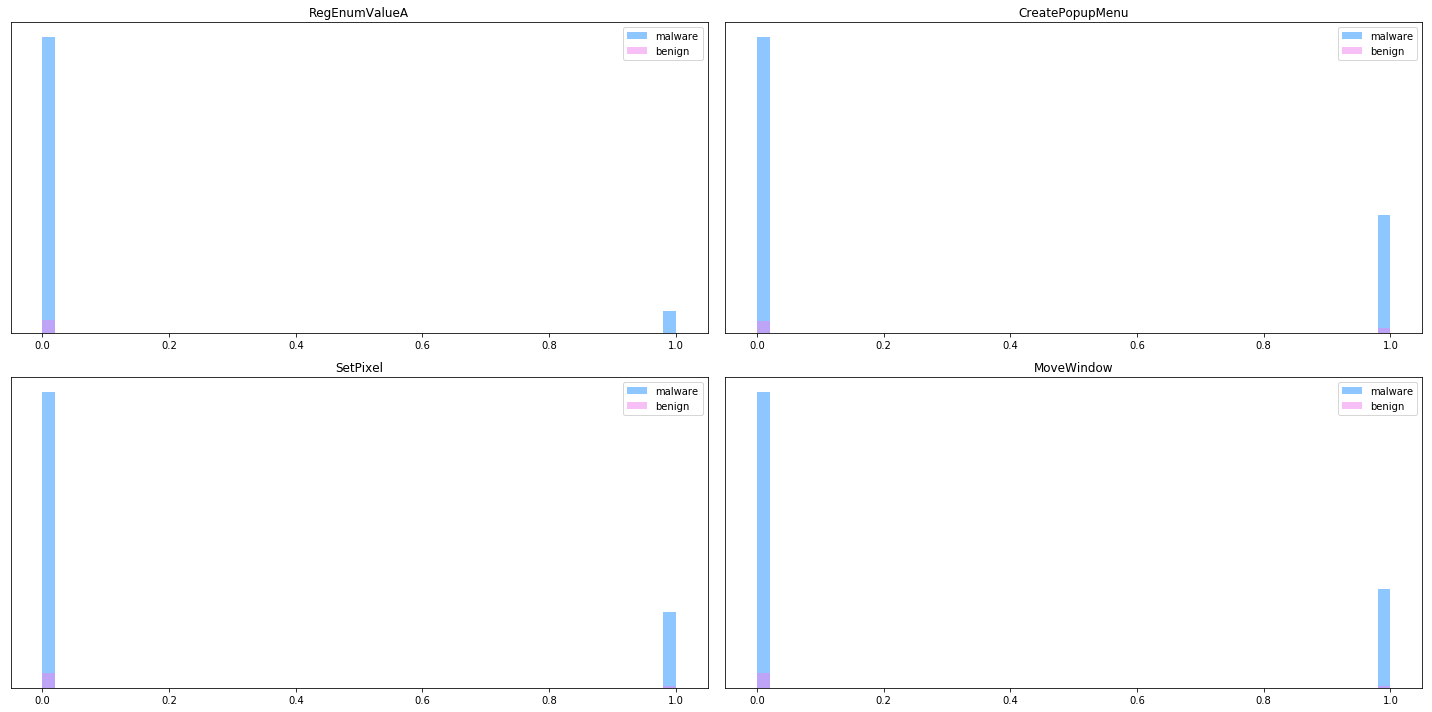

In [13]:
benign = data.loc[ data['label'] == 0, : ]
malware = data.loc[ data['label'] == 1, : ]

choosen = [748,211,335,245]
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
ax = axes.ravel() # axes are 2-dimensional so we unfold them

for i in range(4):
    _, bins = np.histogram(data.iloc[:,choosen[i]], bins=50)
    ax[i].hist(malware.iloc[:,choosen[i]], bins=bins, color='dodgerblue', alpha=.5, label='malware')
    ax[i].hist(benign.iloc[:,choosen[i]], bins=bins, color='violet', alpha=.5, label='benign')
    ax[i].set_title(data.columns.values[choosen[i]])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

<br><br><br>

## feature selection

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
# 80 - 20

train80 = pd.read_csv("database/IEEE/ieee/0/ieee_train_80.csv")
test80 = pd.read_csv("database/IEEE/ieee/0/ieee_test_20.csv")

sel80 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(sel80.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.0s finished


225


In [4]:
# only selected features
selected_features80 = pd.DataFrame(sel80.get_support())

selected_train80 = train80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_train80["label"] = train80["label"]
selected_train80.to_csv("database/IEEE/ieee/0/ieee_train_selected_80.csv", index=False)

selected_test80 = test80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_test80["label"] = test80["label"]
selected_test80.to_csv("database/IEEE/ieee/0/ieee_test_selected_20.csv", index=False)

print(selected_train80.columns.tolist())

['GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError', 'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle', 'MultiByteToWideChar', 'GetCurrentThreadId', 'FindClose', 'LeaveCriticalSection', 'EnterCriticalSection', 'VirtualAlloc', 'DeleteCriticalSection', 'WideCharToMultiByte', 'RegCloseKey', 'ReadFile', 'SetFilePointer', 'GetCurrentProcess', 'GetACP', 'UnhandledExceptionFilter', 'RaiseException', 'RtlUnwind', 'TlsGetValue', 'TlsSetValue', 'GetModuleHandleW', 'GetCPInfo', 'GetCurrentProcessId', 'VirtualFree', 'GetDC', 'GetModuleFileNameW', 'CreateFileW', 'SetEndOfFile', 'SetLastError', 'GetCommandLineW', 'QueryPerformanceCounter', 'VirtualQuery', 'ShowWindow', 'TerminateProcess', 'HeapFree', 'HeapAlloc', 'CreateThread', 'GetModuleHandleA', 'GetCommandLineA', 'IsWindow', 'IsDebuggerPresent', 'SetTimer', 'LoadLibraryA', 'GetStartupInfoW', 'GetFileSize', 'VariantInit', 'SysFreeString', 'LoadResource', 'GetSystemInfo', 'SetEvent', 'LocalFree', 'VirtualProtect', 'GetTickCount', 'Va

In [5]:
# 70 - 30

train70 = pd.read_csv("database/IEEE/ieee/0/ieee_train_70.csv")
test70 = pd.read_csv("database/IEEE/ieee/0/ieee_test_30.csv")

sel70 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(sel70.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s


231


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.9s finished


In [6]:
# only selected features
selected_features70 = pd.DataFrame(sel70.get_support())

selected_train70 = train70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_train70["label"] = train70["label"]
selected_train70.to_csv("database/IEEE/ieee/0/ieee_train_selected_70.csv", index=False)

selected_test70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test70["label"] = test70["label"]
selected_test70.to_csv("database/IEEE/ieee/0/ieee_test_selected_30.csv", index=False)

print(selected_train70.columns.tolist())

['GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError', 'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle', 'MultiByteToWideChar', 'GetCurrentThreadId', 'FindClose', 'LeaveCriticalSection', 'EnterCriticalSection', 'VirtualAlloc', 'DeleteCriticalSection', 'WideCharToMultiByte', 'RegCloseKey', 'ReadFile', 'SetFilePointer', 'GetCurrentProcess', 'GetACP', 'UnhandledExceptionFilter', 'RaiseException', 'RtlUnwind', 'TlsGetValue', 'TlsSetValue', 'GetModuleHandleW', 'GetCPInfo', 'GetCurrentProcessId', 'VirtualFree', 'GetDC', 'GetModuleFileNameW', 'CreateFileW', 'SetEndOfFile', 'SetLastError', 'GetCommandLineW', 'QueryPerformanceCounter', 'VirtualQuery', 'ShowWindow', 'TerminateProcess', 'HeapFree', 'HeapAlloc', 'CreateThread', 'GlobalAlloc', 'GetModuleHandleA', 'GetCommandLineA', 'LoadLibraryExW', 'IsDebuggerPresent', 'SetTimer', 'LoadLibraryA', 'GetStartupInfoW', 'GetFileSize', 'TranslateMessage', 'VariantInit', 'SysFreeString', 'LoadResource', 'GetSystemInfo', 'SetEvent', 'LocalFre

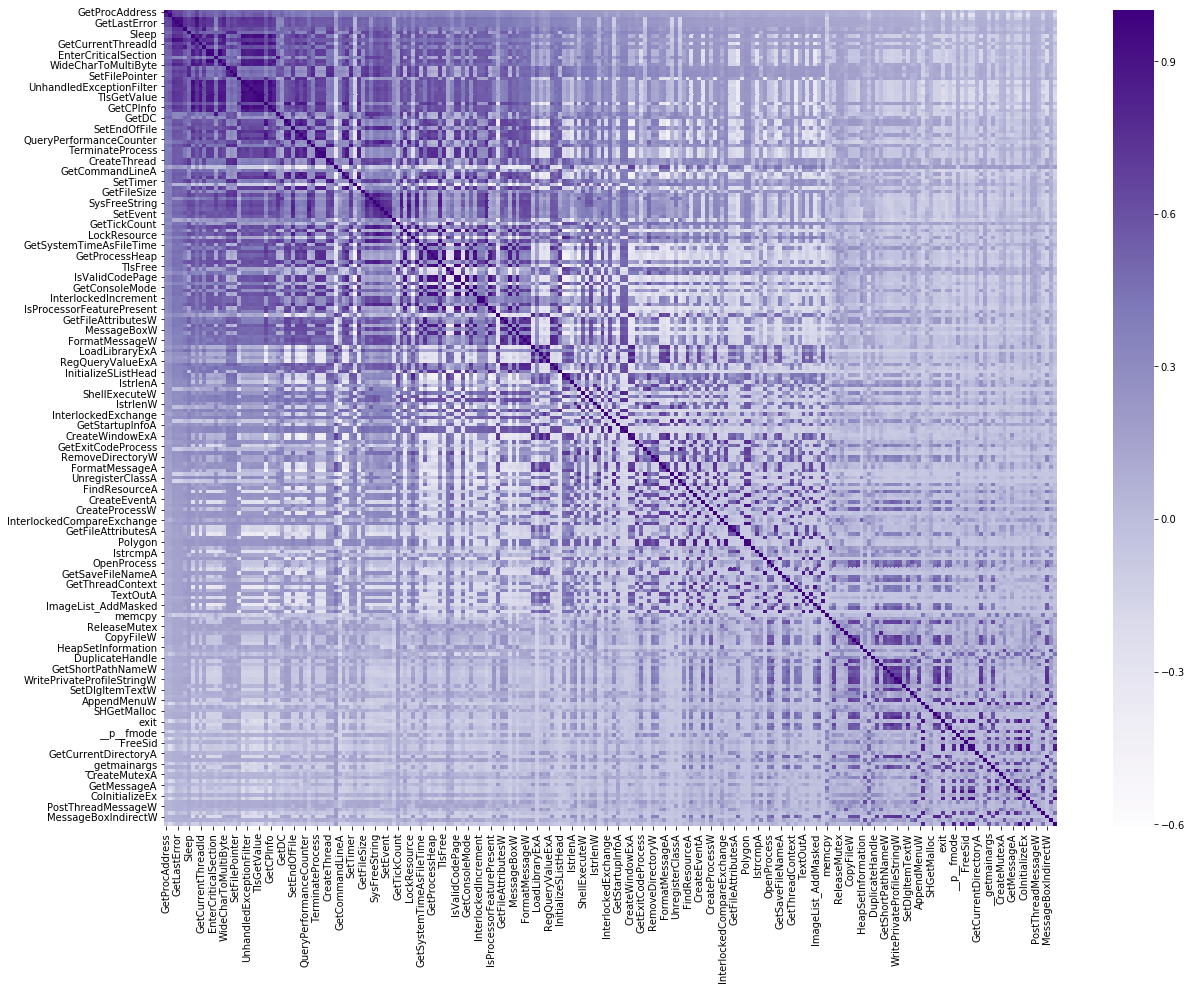

In [7]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in selected_train70.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, selected_train70[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

<br><br>

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [5]:
# 80 - 20
rfecv_rf_ovo80 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(rfecv_rf_ovo80.get_support()))

ValueError: could not convert string to float: '21abe59ef5c012d20c91475d0eb8711d'

In [ ]:
# only selected features
selected_features_rfecv80 = pd.DataFrame(rfecv_rf_ovo80.get_support())

selected_train_rfecv80 = train80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_train_rfecv80["label"] = train80["label"]
selected_train_rfecv80.to_csv("database/IEEE/ieee/0/ieee_train_selected_rfecv_80.csv", index=False)

selected_test_rfecv80 = test80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_test_rfecv80["label"] = test80["label"]
selected_test_rfecv80.to_csv("database/IEEE/ieee/0/ieee_test_selected_rfecv_20.csv", index=False)

print(selected_train_rfecv80.columns.tolist())

In [ ]:
# 70 - 30
rfecv_rf_ovo70 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(rfecv_rf_ovo70.get_support()))

In [ ]:
# only selected features
selected_features_rfecv70 = pd.DataFrame(rfecv_rf_ovo70.get_support())

selected_train_rfecv70 = train70.drop(["label"], axis=1).loc[:,selected_features_rfecv70.values.ravel()]
selected_train_rfecv70["label"] = train70["label"]
selected_train_rfecv70.to_csv("database/IEEE/ieee/0/ieee_train_selected_rfecv_70.csv", index=False)

selected_test_rfecv70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test_rfecv70["label"] = test70["label"]
selected_test_rfecv70.to_csv("database/IEEE/ieee/0/ieee_test_selected_rfecv_30.csv", index=False)

print(selected_train70.columns.tolist())